# Projektarbeit – Grundlagen und Anwendungen der Wahrscheinlichkeitstheorie

**Thema:** Statistische Analyse  Landwirtschaftliche Betriebe – Struktur- und Nutzungsmerkmale  
**Veranstaltung:** Grundlagen und Anwendungen der Wahrscheinlichkeitstheorie  
**Semester:** Wintersemester 2025/2026  
**Studierender:** Alex Straßburger und Paul Gib  
**Matrikelnummer:** Alex Straßburger: 432248, Paul Gib: 432002   

---

## Datensatzbeschreibung (R2.1)


### Überblick über die Struktur des Datensatzes

Der vorliegende Datensatz umfasst 52 Beobachtungen und enthält zwei Variablen.
Eine Beobachtung entspricht jeweils einer Bodennutzungsart.

Die Variable **Bodennutzungsarten** beschreibt unterschiedliche landwirtschaftliche
Nutzungsformen in kategorialer Form.

Die Variable **Landwirtsch. Betriebe mit ökologischem Landbau Anzahl** gibt die Anzahl
der landwirtschaftlichen Betriebe an, die ökologischen Landbau betreiben, bezogen auf
die jeweilige Bodennutzungsart.


### Format und technischer Zustand der Daten

Der Datensatz liegt in tabellarischer Form als CSV-Datei vor.
Die Daten sind zeilenweise organisiert, wobei jede Zeile eine Ausprägung der
Bodennutzungsart darstellt.

Zum Zeitpunkt der ersten Einlesung liegen die Daten noch in Rohform vor und enthalten
formatierungsbedingte Besonderheiten, die im weiteren Verlauf bereinigt werden.


Einlesen des Datensatzes


Der Datensatz wird aus einer CSV-Datei eingelesen und in einem DataFrame gespeichert.
Dieser Schritt dient ausschließlich der Initialisierung der Datenstruktur und stellt
die Grundlage für alle weiteren Analysen dar.


In [4]:
import pandas as pd

df = pd.read_csv(
    "../data/datensatz2.csv",
    sep=";",
    decimal=","
)


In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 2 columns):
 #   Column                                                 Non-Null Count  Dtype 
---  ------                                                 --------------  ----- 
 0   Bodennutzungsarten                                     51 non-null     object
 1   Landwirtsch. Betriebe mit ökologischem Landbau
Anzahl  52 non-null     object
dtypes: object(2)
memory usage: 964.0+ bytes


Der Datensatz enthält eine nominalskalierte Variable
(Bodennutzungsarten) sowie eine metrische Variable in Form absoluter Häufigkeiten.
Die Daten liegen in aggregierter Form vor und bilden keine Einzelbetriebe ab.


Hinweis:
Die Datensatzbeschreibung erfolgt bewusst vor der Datenbereinigung und der
statistischen Auswertung. Eventuelle Inkonsistenzen oder Formatierungsartefakte
werden erst in den folgenden Schritten behandelt.


## Verwendete Software und genutzte Funktionen (R2.4)


Die statistische Auswertung des Datensatzes erfolgt mit der Programmiersprache
Python. Als Arbeitsumgebung wird ein Jupyter Notebook verwendet, das eine
strukturierte Kombination aus Programmcode, textueller Dokumentation und
grafischer Darstellung ermöglicht.

Für die Datenverarbeitung, Analyse und Visualisierung werden etablierte
Standardbibliotheken eingesetzt, die eine reproduzierbare und nachvollziehbare
Auswertung sicherstellen.


In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats


Die Bibliothek **pandas** wird zum Einlesen, Verwalten und Bearbeiten tabellarischer
Daten verwendet. Sie bildet die Grundlage für die Datenbereinigung sowie für die
Erstellung von Ur- und Ranglisten.

Die Bibliothek **numpy** wird zur Unterstützung numerischer Berechnungen eingesetzt,
insbesondere bei der Bestimmung statistischer Kennzahlen.

Die Bibliothek **matplotlib** dient der Erstellung grafischer Darstellungen wie
Box-Whisker-Plots, Scatterplots und weiterer geeigneter Visualisierungen.

Die Bibliothek **scipy.stats** wird zur Berechnung weiterführender statistischer
Kennzahlen verwendet.


Hinweis:
Alle Berechnungen und grafischen Darstellungen werden innerhalb des Jupyter
Notebooks durchgeführt. Dadurch ist die gesamte Auswertung vollständig
reproduzierbar und nachvollziehbar.


## Einlesen und Bereinigung der Daten (R2.2 / R2.3)


Nach der initialen Datensatzbeschreibung werden die eingelesenen Rohdaten
systematisch überprüft und bereinigt. Ziel dieses Schrittes ist es, einen
konsistenten und auswertbaren Datensatz zu erzeugen.

Dabei werden typische Formatierungsartefakte entfernt, die aus der ursprünglichen
Datenquelle resultieren, wie zusätzliche Kopfzeilen, Zeilenumbrüche in
Spaltennamen sowie nicht numerisch dargestellte fehlende Werte.


In [12]:
# Spaltennamen bereinigen (Zeilenumbrüche entfernen)
df.columns = df.columns.str.replace("\n", " ").str.strip()

# Zusätzliche Kopfzeile entfernen
df = df.iloc[1:].reset_index(drop=True)

# Fehlende Werte kennzeichnen ('.' als fehlender Wert)
df["Landwirtsch. Betriebe mit ökologischem Landbau Anzahl"] = (
    df["Landwirtsch. Betriebe mit ökologischem Landbau Anzahl"]
    .replace(".", np.nan)
)

# Zeilen mit fehlenden Werten entfernen
df = df.dropna().reset_index(drop=True)

# Datentyp der metrischen Variable korrigieren
df["Landwirtsch. Betriebe mit ökologischem Landbau Anzahl"] = (
    df["Landwirtsch. Betriebe mit ökologischem Landbau Anzahl"]
    .astype(int)
)

# Struktur nach der Bereinigung überprüfen
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 2 columns):
 #   Column                                                 Non-Null Count  Dtype 
---  ------                                                 --------------  ----- 
 0   Bodennutzungsarten                                     50 non-null     object
 1   Landwirtsch. Betriebe mit ökologischem Landbau Anzahl  50 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 932.0+ bytes


Durch die durchgeführten Bereinigungsschritte wurde der Datensatz in einen
konsistenten und auswertbaren Zustand überführt. Die zusätzliche Kopfzeile sowie
formatierungsbedingte Besonderheiten wurden entfernt.

Die metrische Variable liegt nun in numerischer Form vor, und der Datensatz
enthält keine fehlenden Werte mehr. Damit sind die Voraussetzungen für die
weiterführende statistische Auswertung erfüllt.


Hinweis:
Die Datenbereinigung wurde bewusst vor allen statistischen Berechnungen
durchgeführt. Ab diesem Punkt werden die Daten nicht mehr verändert, um die
Nachvollziehbarkeit der folgenden Auswertungen sicherzustellen.


## Konsolidierte Excel-Datei (R2.5)


Nach Abschluss der Datenbereinigung werden die bereinigten Daten in einer
konsolidierten Excel-Datei gespeichert. Diese Datei enthält ausschließlich den
bereinigten Datensatz und stellt die Grundlage für alle weiteren Auswertungen dar.

Durch die Speicherung im Excel-Format wird eine einfache Weiterverwendung der
Daten außerhalb der Python-Umgebung ermöglicht.


In [15]:
df.to_excel(
    "../export/datensatz2_konsolidiert.xlsx",
    index=False
)


Der bereinigte Datensatz wurde erfolgreich als konsolidierte Excel-Datei im
.xlsx-Format gespeichert. Damit liegen die bereinigten Daten in der geforderten
Form vor.


Hinweis:
Ab diesem Punkt wird der Datensatz nicht mehr verändert. Alle folgenden
statistischen Auswertungen beziehen sich ausschließlich auf die konsolidierte
und bereinigte Version der Daten.


## Urlisten der Variablen (R2.6)


Für jede Variable des Datensatzes wird eine Urliste erstellt. Die Urliste enthält
die beobachteten Werte in ihrer ursprünglichen Reihenfolge, ohne Sortierung oder
statistische Verarbeitung.

Die Urlisten dienen als Grundlage für die weiteren statistischen Auswertungen
und werden jeweils als separate CSV-Dateien gespeichert.


In [20]:
# Urliste der Variable "Bodennutzungsarten"
urliste_bodennutzungsarten = df[["Bodennutzungsarten"]]

urliste_bodennutzungsarten.to_csv(
    "../export/urlisten/urliste_bodennutzungsarten.csv",
    index=False
)

# Urliste der Variable "Landwirtsch. Betriebe mit ökologischem Landbau Anzahl"
urliste_betriebe_oekologisch = df[
    ["Landwirtsch. Betriebe mit ökologischem Landbau Anzahl"]
]

urliste_betriebe_oekologisch.to_csv(
    "../export/urlisten/urliste_landwirtsch_betriebe_oekologischer_landbau_anzahl.csv",
    index=False
)


Die Urlisten der beiden Variablen wurden erfolgreich erstellt und als separate
CSV-Dateien gespeichert. Die enthaltenen Werte entsprechen der ursprünglichen
Reihenfolge der Beobachtungen im bereinigten Datensatz.


Hinweis:
Die Urliste stellt die elementarste Form der Datenorganisation dar. Sie bildet
die Grundlage für die Erstellung von Ranglisten sowie für die Berechnung
statistischer Kennzahlen in den folgenden Abschnitten.


## Ranglisten der Variablen (R2.7)


Für jede Variable des Datensatzes wird eine Rangliste erstellt. Die Ranglisten
entstehen durch Sortierung der jeweiligen Urlisten und ermöglichen eine geordnete
Darstellung der beobachteten Werte.

Die Art der Sortierung richtet sich nach dem Skalenniveau der jeweiligen Variable.


In [22]:
# Rangliste der nominalen Variable "Bodennutzungsarten"
rangliste_bodennutzungsarten = (
    df[["Bodennutzungsarten"]]
    .sort_values(by="Bodennutzungsarten", ascending=True)
)

rangliste_bodennutzungsarten.to_csv(
    "../export/ranglisten/rangliste_bodennutzungsarten.csv",
    index=False
)

# Rangliste der metrischen Variable
# "Landwirtsch. Betriebe mit ökologischem Landbau Anzahl"
rangliste_betriebe_oekologisch = (
    df[["Landwirtsch. Betriebe mit ökologischem Landbau Anzahl"]]
    .sort_values(
        by="Landwirtsch. Betriebe mit ökologischem Landbau Anzahl",
        ascending=True
    )
)

rangliste_betriebe_oekologisch.to_csv(
    "../export/ranglisten/rangliste_landwirtsch_betriebe_oekologischer_landbau_anzahl.csv",
    index=False
)


Die Ranglisten der beiden Variablen wurden erfolgreich erstellt und als separate
CSV-Dateien gespeichert. Die Rangliste der nominalen Variable ist alphabetisch
geordnet, während die Rangliste der metrischen Variable eine aufsteigende
Sortierung der beobachteten Werte enthält.


Hinweis:
Ranglisten ermöglichen eine strukturierte Betrachtung der Daten und bilden die
Grundlage für die Berechnung weiterer statistischer Kennzahlen wie Median,
Quartile und Variationsmaße.


## Lageparameter: Modus, arithmetischer Mittelwert und Median (R2.8)


Lageparameter beschreiben die zentrale Tendenz einer Datenverteilung.
Zu den wichtigsten Lageparametern zählen der Modus, der arithmetische Mittelwert
sowie der Median.

Welche dieser Kennzahlen sinnvoll interpretierbar ist, hängt vom Skalenniveau
der jeweiligen Variable ab.


In [23]:
# Modus
modus_betriebe_oekologisch = (
    df["Landwirtsch. Betriebe mit ökologischem Landbau Anzahl"].mode()
)

# Arithmetischer Mittelwert
mittelwert_betriebe_oekologisch = (
    df["Landwirtsch. Betriebe mit ökologischem Landbau Anzahl"].mean()
)

# Median
median_betriebe_oekologisch = (
    df["Landwirtsch. Betriebe mit ökologischem Landbau Anzahl"].median()
)

modus_betriebe_oekologisch, mittelwert_betriebe_oekologisch, median_betriebe_oekologisch


(0      90
 1    1470
 Name: Landwirtsch. Betriebe mit ökologischem Landbau Anzahl, dtype: int64,
 np.float64(2523.0),
 930.0)

Der arithmetische Mittelwert beschreibt die durchschnittliche Anzahl
landwirtschaftlicher Betriebe mit ökologischem Landbau pro Bodennutzungsart.

Der Median teilt die Verteilung in zwei gleich große Hälften und ist gegenüber
Extremwerten robuster als der Mittelwert.

Der Modus gibt den am häufigsten vorkommenden Wert an.


In [25]:
# Modus der nominalen Variable
modus_bodennutzungsarten = df["Bodennutzungsarten"].mode()

modus_bodennutzungsarten


0                                           Ackerbohnen
1                      Andere Dauerkulturen im Freiland
2              Andere Hülsenfrüchte zur Körnergewinnung
3                  Andere Ölfrüchte zur Körnergewinnung
4     Aus d.Erz.gen.Dauergrünl.m.Beihilfe-/Prämienan...
5           Baum- und Beerenobst (einschließlich Nüsse)
6                          Baumobstanlagen für Kernobst
7              Baumobstanlagen für Kernobst im Freiland
8                         Baumobstanlagen für Steinobst
9             Baumobstanlagen für Steinobst im Freiland
10                                          Baumschulen
11                              Baumschulen im Freiland
12                   Beerenobstanlagen (ohne Erdbeeren)
13       Beerenobstanlagen (ohne Erdbeeren) im Freiland
14                              Blumen und Zierpflanzen
15                  Blumen und Zierpflanzen im Freiland
16                                        Dauergrünland
17                                        Dauerk

Für die nominalskalierte Variable „Bodennutzungsarten“ ist ausschließlich der
Modus sinnvoll interpretierbar. Arithmetischer Mittelwert und Median sind für
nominale Merkmale nicht definiert und werden daher nicht berechnet.


Hinweis:
Sofern jede Bodennutzungsart im Datensatz nur einmal vorkommt, existiert kein
eindeutiger Modus. In diesem Fall ist der Modus statistisch nicht aussagekräftig.


### Zusammenfassung der Lageparameter (tabellarische Darstellung)


Zur besseren Übersicht werden die berechneten Lageparameter der metrischen Variable
in tabellarischer Form zusammengefasst. Diese Darstellung erleichtert den Vergleich
der Kennzahlen und dient als Grundlage für die spätere Berichterstellung.


In [28]:
lageparameter_betriebe_oekologisch = pd.DataFrame({
    "Lageparameter": [
        "Modus",
        "Arithmetischer Mittelwert",
        "Median"
    ],
    "Wert": [
        "kein eindeutiger Modus"
        if len(modus_betriebe_oekologisch) > 1
        else modus_betriebe_oekologisch.iloc[0],
        mittelwert_betriebe_oekologisch,
        median_betriebe_oekologisch
    ]
})

lageparameter_betriebe_oekologisch


,Lageparameter,Wert
0,Modus,kein eindeutiger Modus
1,Arithmetischer Mittelwert,2523.0
2,Median,930.0


Die tabellarische Darstellung fasst die berechneten Lageparameter übersichtlich
zusammen. Sie verdeutlicht die Unterschiede zwischen arithmetischem Mittelwert
und Median und unterstützt die Interpretation der Verteilung der Daten.


### Lageparameter der nominalen Variable


In [31]:
lageparameter_bodennutzungsarten = pd.DataFrame({
    "Lageparameter": ["Modus"],
    "Wert": ["kein eindeutiger Modus"]
})

lageparameter_bodennutzungsarten


,Lageparameter,Wert
0,Modus,kein eindeutiger Modus


Für die nominalskalierte Variable ist ausschließlich der Modus sinnvoll
interpretierbar. Da jede Bodennutzungsart nur einmal im Datensatz vorkommt,
existiert kein eindeutiger Modus.


## Spannweite (R2.9)


Die Spannweite ist ein einfaches Streuungsmaß und berechnet sich als Differenz
zwischen dem Maximum und dem Minimum einer metrischen Variable. Sie gibt an,
wie weit die beobachteten Werte insgesamt auseinanderliegen.

Für nominalskalierte Variablen ist die Spannweite nicht definiert und daher
nicht sinnvoll berechenbar.


In [34]:
# Minimum und Maximum
min_betriebe_oekologisch = (
    df["Landwirtsch. Betriebe mit ökologischem Landbau Anzahl"].min()
)

max_betriebe_oekologisch = (
    df["Landwirtsch. Betriebe mit ökologischem Landbau Anzahl"].max()
)

# Spannweite
spannweite_betriebe_oekologisch = (
    max_betriebe_oekologisch - min_betriebe_oekologisch
)

min_betriebe_oekologisch, max_betriebe_oekologisch, spannweite_betriebe_oekologisch


(20, 26090, 26070)

Die Spannweite gibt den gesamten Wertebereich der Anzahl landwirtschaftlicher
Betriebe mit ökologischem Landbau über alle Bodennutzungsarten hinweg an.
Ein großer Spannweitenwert weist auf deutliche Unterschiede zwischen den
Bodennutzungsarten hin.


Hinweis:
Die Spannweite reagiert empfindlich auf Extremwerte und sollte daher stets in
Kombination mit weiteren Streuungsmaßen interpretiert werden. Für die
nominalskalierte Variable „Bodennutzungsarten“ ist die Spannweite nicht definiert
und wird nicht berechnet.


### Tabellarische Darstellung der Spannweite


Zur besseren Übersicht werden das Minimum, das Maximum sowie die daraus
resultierende Spannweite der metrischen Variable tabellarisch zusammengefasst.
Diese Darstellung erleichtert die spätere Berichterstellung.


In [36]:
spannweite_tabelle_oekologisch = pd.DataFrame({
    "Kennzahl": ["Minimum", "Maximum", "Spannweite"],
    "Wert": [
        min_betriebe_oekologisch,
        max_betriebe_oekologisch,
        spannweite_betriebe_oekologisch
    ]
})

spannweite_tabelle_oekologisch


,Kennzahl,Wert
0,Minimum,20
1,Maximum,26090
2,Spannweite,26070


Die Tabelle zeigt übersichtlich den Wertebereich der Anzahl landwirtschaftlicher
Betriebe mit ökologischem Landbau. Die Spannweite verdeutlicht die Unterschiede
zwischen den Bodennutzungsarten.


## Mittlere Abweichung vom Median (R2.10)


Die mittlere Abweichung vom Median wird berechnet, indem für jede Beobachtung
die absolute Abweichung vom Median bestimmt und anschließend der Mittelwert
dieser Abweichungen gebildet wird.

Dieses Streuungsmaß eignet sich insbesondere für schief verteilte Daten, da es
weniger empfindlich auf Extremwerte reagiert als die Spannweite.
Für nominalskalierte Variablen ist die mittlere Abweichung vom Median nicht
definiert.


In [37]:
# Median der metrischen Variable
median_betriebe_oekologisch = (
    df["Landwirtsch. Betriebe mit ökologischem Landbau Anzahl"].median()
)

# Absolute Abweichungen vom Median
abweichungen_median = (
    df["Landwirtsch. Betriebe mit ökologischem Landbau Anzahl"]
    .sub(median_betriebe_oekologisch)
    .abs()
)

# Mittlere Abweichung vom Median
mittlere_abweichung_median_oekologisch = abweichungen_median.mean()

median_betriebe_oekologisch, mittlere_abweichung_median_oekologisch


(930.0, np.float64(2185.0))

Die mittlere Abweichung vom Median gibt an, wie stark die Anzahl landwirtschaftlicher
Betriebe mit ökologischem Landbau im Durchschnitt vom Medianwert abweicht.
Ein höherer Wert weist auf eine stärkere Streuung der Daten um den Median hin.


Hinweis:
Für die nominalskalierte Variable „Bodennutzungsarten“ ist die mittlere Abweichung
vom Median nicht definiert und wird daher nicht berechnet. Dieses Streuungsmaß
sollte stets gemeinsam mit weiteren Kennzahlen interpretiert werden.


### Tabellarische Darstellung der mittleren Abweichung vom Median


In [40]:
abweichungstabelle_oekologisch = pd.DataFrame({
    "Kennzahl": ["Median", "Mittlere Abweichung vom Median"],
    "Wert": [
        median_betriebe_oekologisch,
        mittlere_abweichung_median_oekologisch
    ]
})

abweichungstabelle_oekologisch


,Kennzahl,Wert
0,Median,930.0
1,Mittlere Abweichung vom Median,2185.0


Die tabellarische Darstellung fasst den Median und die zugehörige mittlere
Abweichung übersichtlich zusammen und erleichtert den Vergleich mit weiteren
Streuungsmaßen.


## Stichprobenvarianz (R2.11)


Die Stichprobenvarianz misst die Streuung der Daten um ihren arithmetischen
Mittelwert. Sie berücksichtigt die quadrierten Abweichungen der einzelnen
Beobachtungen vom Mittelwert und ist damit besonders sensitiv gegenüber
größeren Abweichungen.

Bei der Berechnung der Stichprobenvarianz wird durch (n − 1) dividiert, da es
sich um eine Stichprobe handelt. Für nominalskalierte Variablen ist die
Stichprobenvarianz nicht definiert.


In [43]:
# Arithmetischer Mittelwert der metrischen Variable
mittelwert_betriebe_oekologisch = (
    df["Landwirtsch. Betriebe mit ökologischem Landbau Anzahl"].mean()
)

# Stichprobenvarianz (ddof=1)
stichprobenvarianz_oekologisch = (
    df["Landwirtsch. Betriebe mit ökologischem Landbau Anzahl"].var(ddof=1)
)

mittelwert_betriebe_oekologisch, stichprobenvarianz_oekologisch


(np.float64(2523.0), 25997841.836734693)

Die Stichprobenvarianz beschreibt die durchschnittliche quadrierte Abweichung
der Anzahl landwirtschaftlicher Betriebe mit ökologischem Landbau vom
arithmetischen Mittelwert.

Ein hoher Varianzwert weist auf eine starke Streuung der Werte hin und deutet
darauf hin, dass sich die Anzahl der Betriebe zwischen den Bodennutzungsarten
deutlich unterscheidet.


Hinweis:
Für die nominalskalierte Variable „Bodennutzungsarten“ ist die Stichprobenvarianz
nicht definiert und wird daher nicht berechnet. Aufgrund der Quadrierung der
Abweichungen ist die Varianz empfindlich gegenüber Ausreißern.


### Tabellarische Darstellung der Stichprobenvarianz


In [44]:
varianz_tabelle_oekologisch = pd.DataFrame({
    "Kennzahl": [
        "Arithmetischer Mittelwert",
        "Stichprobenvarianz"
    ],
    "Wert": [
        mittelwert_betriebe_oekologisch,
        stichprobenvarianz_oekologisch
    ]
})

varianz_tabelle_oekologisch


,Kennzahl,Wert
0,Arithmetischer Mittelwert,2.523000e+03
1,Stichprobenvarianz,2.599784e+07


Die tabellarische Darstellung fasst den arithmetischen Mittelwert und die
zugehörige Stichprobenvarianz übersichtlich zusammen und erleichtert den
Vergleich mit weiteren Streuungsmaßen.


## Variationskoeffizient (R2.12)


Der Variationskoeffizient ist ein dimensionsloses Streuungsmaß und wird als Quotient
aus der Standardabweichung und dem arithmetischen Mittelwert berechnet.

Er gibt an, wie groß die Streuung im Verhältnis zum Mittelwert ist, und eignet sich
insbesondere zum Vergleich der Streuung verschiedener Datensätze oder Variablen.

Für nominalskalierte Variablen ist der Variationskoeffizient nicht definiert.


In [45]:
# Standardabweichung aus der Stichprobenvarianz
standardabweichung_oekologisch = (
    df["Landwirtsch. Betriebe mit ökologischem Landbau Anzahl"].std(ddof=1)
)

# Variationskoeffizient
variationskoeffizient_oekologisch = (
    standardabweichung_oekologisch / mittelwert_betriebe_oekologisch
)

standardabweichung_oekologisch, variationskoeffizient_oekologisch


(5098.80788388175, np.float64(2.020930592105331))

Der Variationskoeffizient gibt an, wie stark die Anzahl landwirtschaftlicher
Betriebe mit ökologischem Landbau im Verhältnis zum arithmetischen Mittelwert
streut.

Ein hoher Variationskoeffizient weist auf eine große relative Streuung der Daten
hin, während ein niedriger Wert auf eine vergleichsweise homogene Verteilung
schließen lässt.


Hinweis:
Der Variationskoeffizient ist nur für metrische Variablen mit positivem
arithmetischem Mittelwert sinnvoll interpretierbar. Für die nominalskalierte
Variable „Bodennutzungsarten“ wird er nicht berechnet.


### Tabellarische Darstellung des Variationskoeffizienten


In [46]:
variationskoeffizient_tabelle_oekologisch = pd.DataFrame({
    "Kennzahl": [
        "Standardabweichung",
        "Arithmetischer Mittelwert",
        "Variationskoeffizient"
    ],
    "Wert": [
        standardabweichung_oekologisch,
        mittelwert_betriebe_oekologisch,
        variationskoeffizient_oekologisch
    ]
})

variationskoeffizient_tabelle_oekologisch


,Kennzahl,Wert
0,Standardabweichung,5098.807884
1,Arithmetischer Mittelwert,2523.000000
2,Variationskoeffizient,2.020931


Die tabellarische Darstellung fasst die für den Variationskoeffizienten relevanten
Kennzahlen übersichtlich zusammen und erleichtert die spätere Einordnung im
Bericht.


## Box-Whisker-Plot (R2.13)


Der Box-Whisker-Plot ist eine grafische Darstellung zur Analyse der Verteilung
einer metrischen Variable. Er visualisiert den Median, die Quartile sowie mögliche
Ausreißer und erlaubt eine schnelle Einschätzung der Streuung und Schiefe der Daten.

Für nominalskalierte Variablen ist ein Box-Whisker-Plot nicht sinnvoll darstellbar,
da keine numerische Ordnung der Ausprägungen existiert.


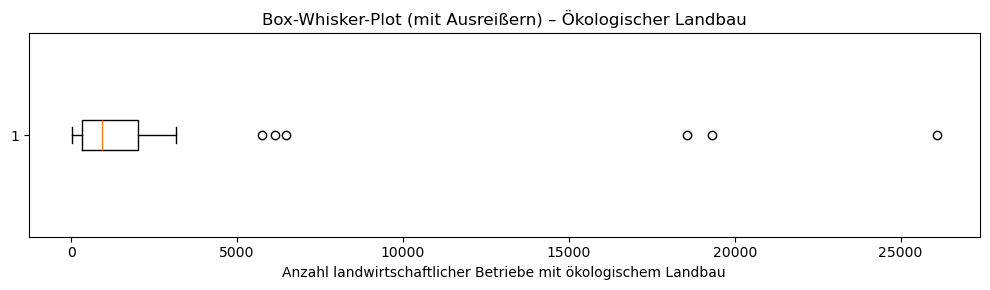

In [50]:
plt.figure(figsize=(10, 3))

plt.boxplot(
    df["Landwirtsch. Betriebe mit ökologischem Landbau Anzahl"],
    vert=False,
    showfliers=True
)

plt.xlabel("Anzahl landwirtschaftlicher Betriebe mit ökologischem Landbau")
plt.title("Box-Whisker-Plot (mit Ausreißern) – Ökologischer Landbau")

plt.tight_layout()
plt.savefig(
    "../figures/boxplot_oekologischer_landbau_mit_ausreissern.png",
    dpi=300,
    bbox_inches="tight"
)
plt.show()



Der Box-Whisker-Plot zeigt die Verteilung der Anzahl landwirtschaftlicher Betriebe
mit ökologischem Landbau über die verschiedenen Bodennutzungsarten hinweg.
Anhand der Box und der Whisker lassen sich Lage und Streuung der Daten sowie
mögliche Ausreißer erkennen.


Hinweis:
Der Box-Whisker-Plot eignet sich besonders zur Identifikation von Ausreißern und
zur Beurteilung der Schiefe einer Verteilung. Für die nominalskalierte Variable
„Bodennutzungsarten“ kann kein Box-Whisker-Plot erstellt werden.


Zur besseren Interpretation der Daten werden zwei Box-Whisker-Plots erstellt.
Neben einer vollständigen Darstellung inklusive Ausreißern wird zusätzlich eine
Darstellung ohne Ausreißer erzeugt, um den zentralen Wertebereich besser sichtbar
zu machen.

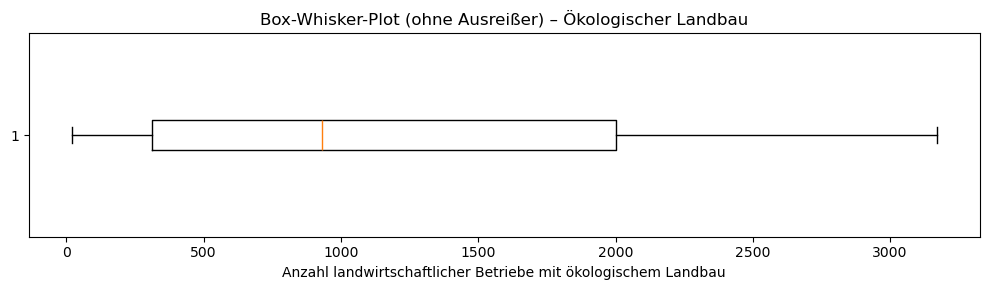

In [51]:
plt.figure(figsize=(10, 3))

plt.boxplot(
    df["Landwirtsch. Betriebe mit ökologischem Landbau Anzahl"],
    vert=False,
    showfliers=False
)

plt.xlabel("Anzahl landwirtschaftlicher Betriebe mit ökologischem Landbau")
plt.title("Box-Whisker-Plot (ohne Ausreißer) – Ökologischer Landbau")

plt.tight_layout()
plt.savefig(
    "../figures/boxplot_oekologischer_landbau_ohne_ausreisser.png",
    dpi=300,
    bbox_inches="tight"
)
plt.show()


## Scatterplot der Daten (R2.14)


Der Scatterplot wird verwendet, um die Verteilung der metrischen Variable über
die einzelnen Beobachtungen darzustellen. Da im vorliegenden Datensatz nur eine
metrische Variable enthalten ist, wird die Beobachtungsnummer (Index) als
unabhängige Variable auf der x-Achse verwendet.

Diese Darstellung dient der Visualisierung der Werteverteilung und nicht der
Analyse eines funktionalen Zusammenhangs.


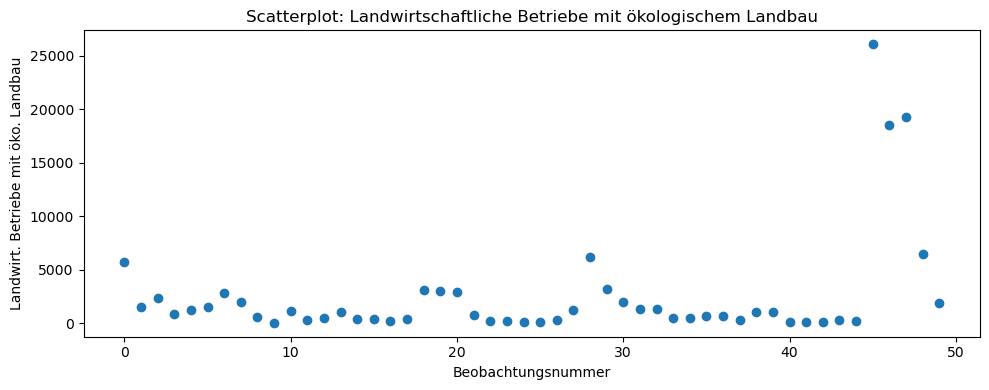

In [57]:
plt.figure(figsize=(10, 4))

plt.scatter(
    df.index,
    df["Landwirtsch. Betriebe mit ökologischem Landbau Anzahl"]
)

plt.xlabel("Beobachtungsnummer")
plt.ylabel("Landwirt. Betriebe mit öko. Landbau")
plt.title("Scatterplot: Landwirtschaftliche Betriebe mit ökologischem Landbau")

plt.tight_layout()
plt.savefig(
    "../figures/scatterplot_oekologischer_landbau.png",
    dpi=300,
    bbox_inches="tight"
)
plt.show()


Der Scatterplot verdeutlicht die Streuung der Anzahl landwirtschaftlicher Betriebe
mit ökologischem Landbau über die einzelnen Beobachtungen hinweg. Ein klarer
funktionaler Zusammenhang ist nicht erkennbar, was aufgrund der Verwendung der
Beobachtungsnummer als unabhängige Variable zu erwarten ist.

Die Darstellung dient primär der Visualisierung der Werteverteilung und möglicher
Extremwerte.


Hinweis:
Der Scatterplot wird hier ausschließlich zur Darstellung der Verteilung der
metrischen Variable verwendet. Aufgrund der Datenstruktur kann kein kausaler
oder funktionaler Zusammenhang interpretiert werden.


## Weitere geeignete grafische Darstellung (R2.15)


Zur Darstellung der Anzahl landwirtschaftlicher Betriebe mit ökologischem Landbau
in Abhängigkeit von den einzelnen Bodennutzungsarten wird ein horizontales
Balkendiagramm verwendet.

Diese Darstellungsform ist besonders geeignet, da sie den direkten Vergleich
zwischen den kategorialen Ausprägungen ermöglicht und auch bei längeren
Bezeichnungen der Kategorien gut lesbar bleibt.


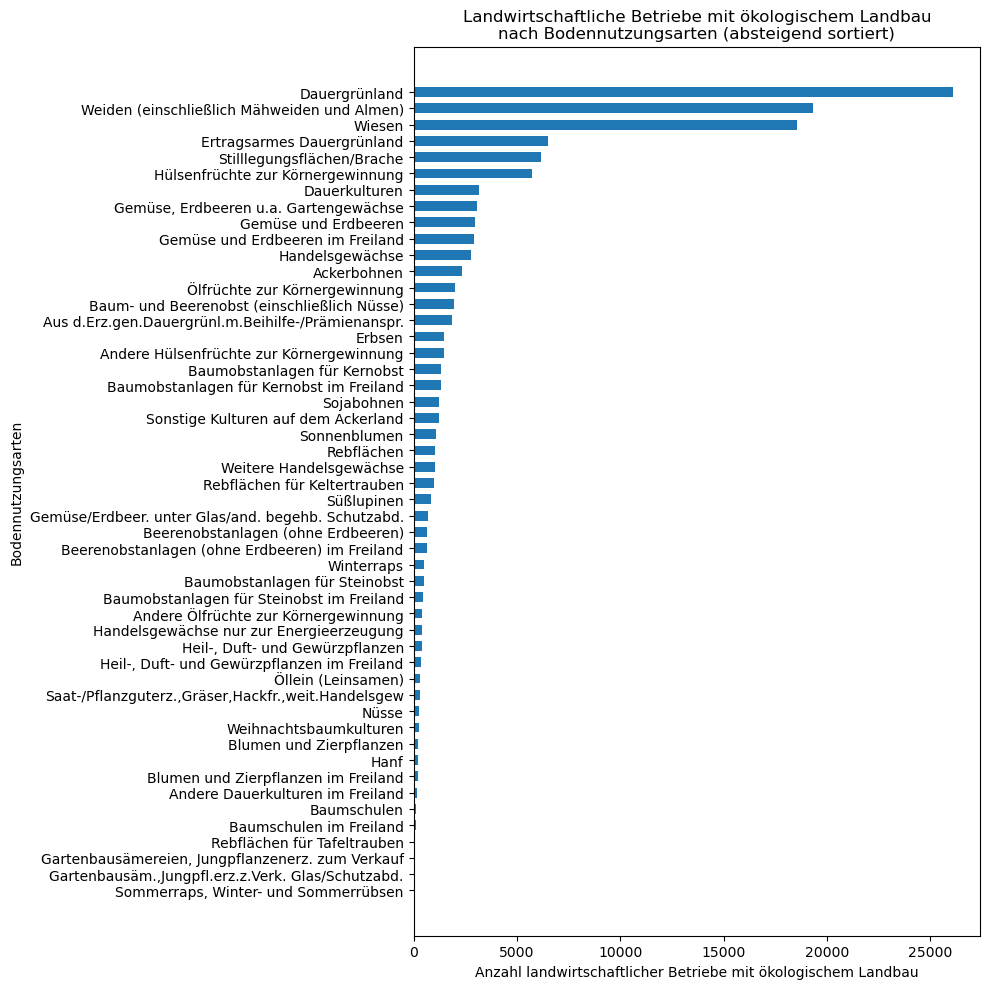

In [63]:
# Daten für das Balkendiagramm sortieren (absteigend)
df_sorted = df.sort_values(
    by="Landwirtsch. Betriebe mit ökologischem Landbau Anzahl",
    ascending=True
)

plt.figure(figsize=(10, 10))

plt.barh(
    df_sorted["Bodennutzungsarten"],
    df_sorted["Landwirtsch. Betriebe mit ökologischem Landbau Anzahl"],
    height=0.6  # kleiner = mehr Abstand zwischen den Balken
)

plt.xlabel("Anzahl landwirtschaftlicher Betriebe mit ökologischem Landbau")
plt.ylabel("Bodennutzungsarten")
plt.title(
    "Landwirtschaftliche Betriebe mit ökologischem Landbau\n"
    "nach Bodennutzungsarten (absteigend sortiert)"
)

plt.tight_layout()
plt.savefig(
    "../figures/balkendiagramm_oekologischer_landbau_bodennutzungsarten_sortiert.png",
    dpi=300,
    bbox_inches="tight"
)
plt.show()


Das horizontale Balkendiagramm verdeutlicht die Unterschiede in der Anzahl
landwirtschaftlicher Betriebe mit ökologischem Landbau zwischen den einzelnen
Bodennutzungsarten. Die Darstellung ermöglicht einen direkten Vergleich der
Ausprägungen und macht besonders hohe bzw. niedrige Werte unmittelbar sichtbar.


Hinweis:
Das horizontale Balkendiagramm wurde gewählt, da es die metrische Variable
übersichtlich in Abhängigkeit von der nominalen Variable darstellt. Andere
Darstellungsformen wie Liniendiagramme oder Kreisdiagramme wären für diese
Datenstruktur weniger geeignet. Die Sortierung des Balkendiagramms dient ausschließlich der besseren visuellen
Darstellung und verändert nicht die zugrunde liegenden Daten.



## Textuelle Zusammenfassung der Daten (R2.16)


Der vorliegende Datensatz beschreibt die Anzahl landwirtschaftlicher Betriebe mit
ökologischem Landbau in Abhängigkeit von unterschiedlichen Bodennutzungsarten.
Nach der Datenbereinigung liegt ein konsistenter und auswertbarer Datensatz vor,
der eine nominalskalierte Variable sowie eine metrische Variable umfasst.

Die Lageparameter zeigen, dass sich die Anzahl der Betriebe zwischen den
Bodennutzungsarten deutlich unterscheidet. Der arithmetische Mittelwert und der
Median weisen auf eine ungleichmäßige Verteilung der Werte hin, wobei einzelne
Bodennutzungsarten deutlich höhere Werte aufweisen als andere.

Die berechneten Streuungsmaße bestätigen diese Beobachtung. Die Spannweite zeigt
einen großen Wertebereich, während die mittlere Abweichung vom Median sowie die
Stichprobenvarianz auf eine ausgeprägte Streuung der Daten hinweisen. Der
Variationskoeffizient verdeutlicht zudem, dass die relative Streuung der Werte im
Verhältnis zum Mittelwert hoch ist.

Die grafischen Darstellungen unterstützen die numerischen Ergebnisse. Der
Box-Whisker-Plot macht die Streuung sowie mögliche Ausreißer sichtbar, während der
Scatterplot die Verteilung der Werte über die einzelnen Beobachtungen verdeutlicht.
Das horizontale Balkendiagramm zeigt anschaulich die Unterschiede zwischen den
einzelnen Bodennutzungsarten und ermöglicht einen direkten Vergleich der
Ausprägungen.

Insgesamt zeigen die Auswertungen, dass die Anzahl landwirtschaftlicher Betriebe
mit ökologischem Landbau stark von der jeweiligen Bodennutzungsart abhängt und
eine hohe Heterogenität zwischen den Kategorien vorliegt.


Hinweis:
Die Zusammenfassung beschränkt sich bewusst auf eine beschreibende Analyse der
vorliegenden Daten. Weitergehende Schlussfolgerungen oder kausale Interpretationen
sind auf Grundlage des Datensatzes nicht möglich.


## Quartile und Dezile (R2.17)


Quartile und Dezile sind Lagemaße, die die sortierten Daten in gleich große
Abschnitte unterteilen. Die Quartile teilen die Daten in vier gleich große Teile,
während die Dezile eine feinere Unterteilung in zehn gleich große Teile
ermöglichen.

Diese Kennzahlen erlauben eine detaillierte Analyse der Verteilung der
metrischen Variable. Für nominalskalierte Variablen sind Quartile und Dezile
nicht definiert.


In [65]:
# Quartile (Q1, Q2 = Median, Q3)
quartile_oekologisch = df[
    "Landwirtsch. Betriebe mit ökologischem Landbau Anzahl"
].quantile([0.25, 0.5, 0.75])

quartile_oekologisch


0.25     312.5
0.50     930.0
0.75    2000.0
Name: Landwirtsch. Betriebe mit ökologischem Landbau Anzahl, dtype: float64

In [66]:
# Dezile (D1 bis D9)
dezile_oekologisch = df[
    "Landwirtsch. Betriebe mit ökologischem Landbau Anzahl"
].quantile(
    [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
)

dezile_oekologisch


0.1     109.0
0.2     254.0
0.3     381.0
0.4     508.0
0.5     930.0
0.6    1214.0
0.7    1584.0
0.8    2820.0
0.9    5781.0
Name: Landwirtsch. Betriebe mit ökologischem Landbau Anzahl, dtype: float64

### Tabellarische Darstellung der Quartile und Dezile


In [77]:
quartile_dezile_tabelle = pd.DataFrame({
    "Quantil": [
        "Q1 (25 %)", "Q2 (Median)", "Q3 (75 %)",
        "D1 (10 %)", "D2 (20 %)", "D3 (30 %)",
        "D4 (40 %)", "D5 (50 %)", "D6 (60 %)",
        "D7 (70 %)", "D8 (80 %)", "D9 (90 %)"
    ],
    "Wert": [
        quartile_oekologisch.loc[0.25],
        quartile_oekologisch.loc[0.5],
        quartile_oekologisch.loc[0.75],
        dezile_oekologisch.loc[0.1],
        dezile_oekologisch.loc[0.2],
        dezile_oekologisch.loc[0.3],
        dezile_oekologisch.loc[0.4],
        dezile_oekologisch.loc[0.5],
        dezile_oekologisch.loc[0.6],
        dezile_oekologisch.loc[0.7],
        dezile_oekologisch.loc[0.8],
        dezile_oekologisch.loc[0.9]
    ]
})

quartile_dezile_tabelle


,Quantil,Wert
0,Q1 (25 %),312.5
1,Q2 (Median),930.0
2,Q3 (75 %),2000.0
3,D1 (10 %),109.0
4,D2 (20 %),254.0
5,D3 (30 %),381.0
6,D4 (40 %),508.0
7,D5 (50 %),930.0
8,D6 (60 %),1214.0
9,D7 (70 %),1584.0


Die Quartile und Dezile geben einen detaillierten Einblick in die Verteilung der
Anzahl landwirtschaftlicher Betriebe mit ökologischem Landbau. Der Median teilt
die Daten in zwei gleich große Hälften, während die weiteren Quantile zeigen,
wie sich die Werte über die Verteilung hinweg entwickeln.

Insbesondere ermöglichen die Dezile eine feinere Beurteilung der Streuung und
der Lage der Daten innerhalb der Verteilung.


Hinweis:
Quartile und Dezile sind nur für metrische Variablen sinnvoll interpretierbar.
Für die nominalskalierte Variable „Bodennutzungsarten“ werden sie daher nicht
berechnet.


## Quartilsabstand (R2.18)


Der Quartilsabstand ist ein robustes Streuungsmaß und wird als Differenz zwischen
dem dritten Quartil (Q3) und dem ersten Quartil (Q1) berechnet.

Er beschreibt die Streuung der mittleren 50 % der Daten und ist im Vergleich zur
Spannweite weniger empfindlich gegenüber Ausreißern.
Für nominalskalierte Variablen ist der Quartilsabstand nicht definiert.


In [72]:
# Quartile erneut verwenden
q1_oekologisch = quartile_oekologisch.loc[0.25]
q3_oekologisch = quartile_oekologisch.loc[0.75]

# Quartilsabstand
quartilsabstand_oekologisch = q3_oekologisch - q1_oekologisch

q1_oekologisch, q3_oekologisch, quartilsabstand_oekologisch


(np.float64(312.5), np.float64(2000.0), np.float64(1687.5))

### Tabellarische Darstellung des Quartilsabstands


In [73]:
quartilsabstand_tabelle_oekologisch = pd.DataFrame({
    "Kennzahl": ["Q1 (25 %)", "Q3 (75 %)", "Quartilsabstand"],
    "Wert": [
        q1_oekologisch,
        q3_oekologisch,
        quartilsabstand_oekologisch
    ]
})

quartilsabstand_tabelle_oekologisch


,Kennzahl,Wert
0,Q1 (25 %),312.5
1,Q3 (75 %),2000.0
2,Quartilsabstand,1687.5


Der Quartilsabstand beschreibt die Streuung der mittleren Hälfte der Anzahl
landwirtschaftlicher Betriebe mit ökologischem Landbau. Ein größerer
Quartilsabstand weist auf eine stärkere Streuung innerhalb dieses zentralen
Datenbereichs hin.


Hinweis:
Der Quartilsabstand ist ein robustes Streuungsmaß und sollte gemeinsam mit
anderen Streuungskennzahlen wie Varianz und Spannweite interpretiert werden.
Für die nominalskalierte Variable „Bodennutzungsarten“ ist er nicht definiert.


## Kovarianz (R2.19)


Die Kovarianz ist ein Maß zur Beschreibung des gemeinsamen linearen Zusammenhangs
zwischen zwei metrischen Variablen. Sie gibt an, ob und in welche Richtung sich
zwei Variablen gemeinsam verändern.

Für die Berechnung der Kovarianz sind mindestens zwei metrisch skalierte Variablen
erforderlich.


Im vorliegenden Datensatz steht lediglich eine metrische Variable zur Verfügung.
Die zweite Variable ist nominalskaliert und beschreibt Bodennutzungsarten.

Da die Kovarianz ausschließlich für Paare metrischer Variablen definiert ist,
kann sie für diesen Datensatz nicht sinnvoll berechnet werden. Aus diesem Grund
wird auf die Angabe der Kovarianz verzichtet.


## Korrelationskoeffizient (R2.20)


Der Korrelationskoeffizient misst die Stärke und Richtung eines linearen
Zusammenhangs zwischen zwei metrischen Variablen. Er ist normiert und nimmt
Werte zwischen −1 und +1 an.

Eine sinnvolle Interpretation des Korrelationskoeffizienten setzt voraus, dass
zwei quantitativ messbare Variablen vorliegen.


Im vorliegenden Datensatz ist lediglich eine metrische Variable enthalten.
Die zweite Variable ist nominalskaliert und besitzt keine numerische Ordnung.

Da ein Korrelationskoeffizient nur für zwei metrische Variablen definiert ist,
kann er für diesen Datensatz nicht sinnvoll berechnet oder interpretiert werden.
Aus diesem Grund wird auf die Angabe des Korrelationskoeffizienten verzichtet.
